# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission

Use this template to complete your analysis and write up your summary for submission.


In [113]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 

In [150]:
# install the imblearn module
!pip install imblearn

In [115]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [116]:
# load dataset
df = pd.read_csv("data/moped.csv")

In [117]:
# inspect dataframe by printing out the first 10 rows
df.head(n=10)

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0
5,Commuting,> 6 months,TVS iQube,5.0,1.0,NaN,5.0,NaN,2.0
6,Commuting,> 6 months,TVS iQube,3.0,2.0,NaN,4.0,NaN,3.0
7,Commuting,<= 6 months,TVS iQube,3.0,1.0,NaN,2.0,NaN,1.0
8,Commuting,<= 6 months,TVS iQube,3.0,3.0,NaN,4.0,NaN,3.0
9,Commuting,<= 6 months,TVS iQube,5.0,3.0,NaN,4.0,NaN,3.0


In [118]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [119]:
# check the number of rows and columns in the dataset
df.shape

(713, 9)

In [120]:
# information on datatypes
df.dtypes

Used it for          object
Owned for            object
Model Name           object
Visual Appeal       float64
Reliability         float64
Extra Features      float64
Comfort             float64
Maintenance cost    float64
Value for Money     float64
dtype: object

In [121]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

float64    6
object     3
dtype: int64

In [122]:
# number of unique values in each features
df.nunique()

Used it for          2
Owned for            3
Model Name          38
Visual Appeal        5
Reliability          5
Extra Features       5
Comfort              5
Maintenance cost     5
Value for Money      5
dtype: int64

In [123]:
# inspect the variables in the 'Used it for' field
uses = [use for use in df['Used it for'].unique()]
print(uses)

['Commuting', 'Leisure']


In [124]:
# inspect the variables in the 'Owned for' field
ownership = [owned for owned in df['Owned for'].unique()]
print(ownership)

['Never owned', '> 6 months', '<= 6 months']


In [125]:
# inspect the variables in the 'Model Name' field
model_name = [model for model in df['Model Name'].unique()]
print(model_name)

['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro', 'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1', 'Bounce Infinity E1', 'Hero Electric Optima CX', 'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300', 'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura', 'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO', 'Odysse Evoqis', 'Okinawa i-Praise', 'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo', 'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria', 'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift', 'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite', 'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt', 'Gemopai Ryder']


In [126]:
# check for missingness in the features
df.isnull().sum()

Used it for           0
Owned for             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

<AxesSubplot:>

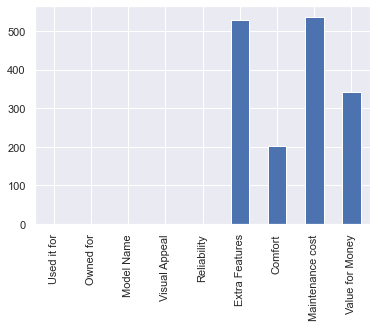

In [127]:
# plot the missingness in the features
df.isnull().sum().plot(kind='bar')

In [128]:
# replace missing values with 0
df = df.fillna(0)

In [129]:
# check the counts of values in the field
df['Owned for'].value_counts()

> 6 months     290
<= 6 months    288
Never owned    135
Name: Owned for, dtype: int64

In [130]:
# replace rows that indicate ownership with 'Owned' in the 'Owned for' field
df['Owned for'] = df['Owned for'].replace(['<= 6 months', '> 6 months'],'Owned')

In [131]:
# check if the replaced values in the 'Owned for' field has been replaced by printing the first 5 rows
df.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0
1,Leisure,Owned,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0
2,Commuting,Owned,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0
3,Commuting,Owned,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0
4,Commuting,Owned,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here*

### Report
1. The shape of the dataset was checked.
2. An overview of the dataset was obtained.
3. The dataset datatypes was obtained.
4. The number of unique values was assessed.
5. Missing values in the dataset was checked.

### Observation
1. The dataset consists of 713 rows and 9 columns.
2. The dataset consists of 3 object datatype and 6 floats datatype.
3. The unique variables in the 'Used it for', 'Owned for', and 'Model Name' fields were assessed.
4. Some people have owned the product for more than 6 months while some have owned it for six months or less.
5. There are a total of 1613 null values.

### Data Cleaning
1. Missing values in the 'Extra Features', 'Comfort', 'Maintenance cost' and 'Value for Money' fields were replaced with 0.
2. Rows that indicate ownership were replaced with 'Owned' in the 'Owned for' field.

In [132]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 

In [133]:
# plot summary statistics 
df.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
std,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
75%,5.000000,5.000000,1.000000,5.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


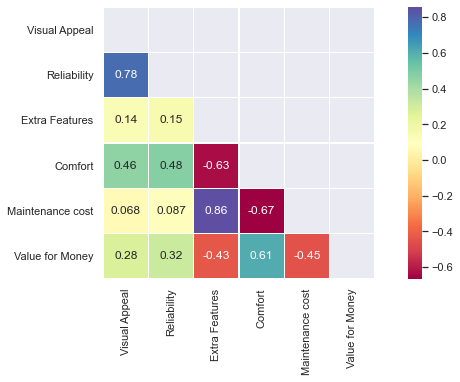

In [134]:
# compute the correlation coefficient of the features and visualize
plt.figure(figsize=(12,5))
corrMatrix = df.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True,linewidths=.3, mask=mask, cmap='Spectral', square=True)
plt.show()

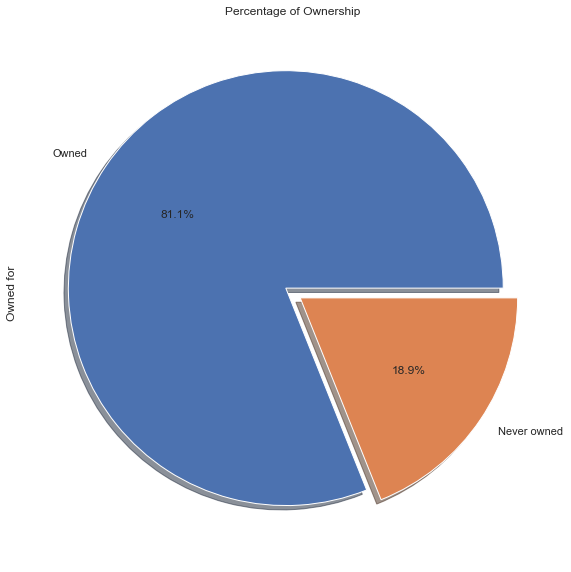

In [135]:
# compute percentage of Ownership
df['Owned for'].value_counts().plot.pie(explode= [0.04, 0.04], autopct = '%1.1f%%', shadow=True, figsize=(12,10))
plt.title('Percentage of Ownership');

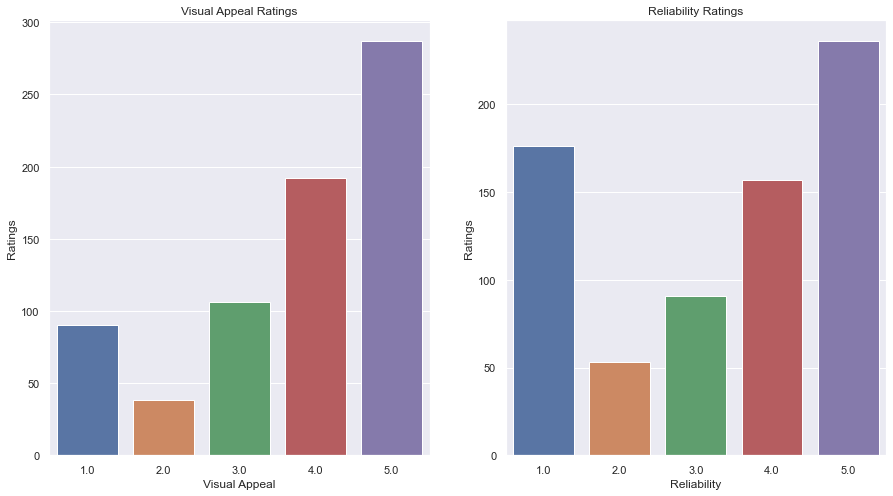

In [136]:
# visualise visual appeal ratings and reliability ratings
fig, axes = plt.subplots(1, 2, figsize=(15,8))

ax1 = sns.countplot(x='Visual Appeal', data=df, ax = axes[0]);
ax1.set(xlabel='Visual Appeal', ylabel='Ratings', title='Visual Appeal Ratings');

ax2 = sns.countplot(x='Reliability', data=df, ax = axes[1]);
ax2.set(xlabel='Reliability', ylabel='Ratings', title='Reliability Ratings');

plt.show()

In [137]:
# encode the categorical variables to numeric
# Never owned/owned
def owned(x):
    if x == 'Never owned':
        return int(1)
    else:
        return int(0)
    
df['Owned for'] = df['Owned for'].apply(owned)

In [138]:
# for modeling purpose, encode categorical variables to numeric using Ordinal Encoder
cols = ['Used it for', 'Model Name']
ord_enc = OrdinalEncoder()
df[cols] = ord_enc.fit_transform(df[cols])

In [139]:
df.head(10)

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,0.0,1,32.0,3.0,4.0,0.0,4.0,0.0,1.0
1,1.0,0,32.0,3.0,1.0,0.0,3.0,0.0,3.0
2,0.0,0,32.0,4.0,4.0,0.0,5.0,0.0,2.0
3,0.0,0,32.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0,32.0,3.0,4.0,0.0,3.0,0.0,2.0
5,0.0,0,32.0,5.0,1.0,0.0,5.0,0.0,2.0
6,0.0,0,32.0,3.0,2.0,0.0,4.0,0.0,3.0
7,0.0,0,32.0,3.0,1.0,0.0,2.0,0.0,1.0
8,0.0,0,32.0,3.0,3.0,0.0,4.0,0.0,3.0
9,0.0,0,32.0,5.0,3.0,0.0,4.0,0.0,3.0


In [140]:
# create explanatory variable (X) and response variable (y)
X = df.drop("Owned for", axis=1)
y = df["Owned for"]

In [141]:
# split data into train and test sets - 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (570, 8)
y_train shape: (570,)
X_test shape: (143, 8)
y_test shape: (143,)


In [142]:
# the exploratory data analysis showed that the dataset is imbalanced, oversampling is required to balance the dataset

X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (922, 8)
y_train shape: (922,)
X_test shape: (234, 8)
y_test shape: (234,)


In [143]:
# standardize data
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

*Write your description here*

### Report
1. The heatmap clearly illustrates a positive correlation between the Visual Appeal ratings and the Reliability ratings recieved.
2. The piechart reveals that 81.1% of reviewers owned a moped while 18.9% did not own a moped.
3. As revealed by the barcharts, most people gave a 5-star rating to the visual appeal and reliability of the moped.
4. The categorical variables were encoded to numeric as this is necessary for machine learning. 
5. The explanatory variable (X) and response variable (y) were created and splitted train and test set.
6. Oversampling was performed on the train and test set to adjust the class distribution of a data set as the percentage of response variable (Never owned to Owned) is somewhat large.
7. The train and test was standardized so as to keep all features within the same distance metric.

In [144]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 

In [145]:
# baseline model - logistic regression classifier 
clf = LogisticRegression()

# rain the classifer on the train set
clf.fit(scalled_x_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(scalled_x_test)


# Choose and fit a comparison model
# Create a Decision Tree classifier object
clf_2 = DecisionTreeClassifier()

# Train the classifer on the train set
clf_2.fit(scalled_x_train, y_train)

# Predict the outcomes on the test set
y_pred_2 = clf_2.predict(scalled_x_test)

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

*Write your description here*

### Report

1. This is a classification problem as it is a supervised learning technique in which the computer program learns from the training data and makes new observations.
2. For my baseline model, LogisticRegression was chosen because it is used to find the probability of event success and event failure. Also, LogisticRegression provides good accuracy for many simple data sets and it performs well when the dataset is linearly separable. From the foregoing, the dataset is historical and LogisticRegression can predict whether: A customer 'Owned' or 'Never owned'.
3. For my comparison model, DecisionTreeClassifier was chosen because it is simple to understand and can quickly identify non-linear patterns.

In [146]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here... 

In [147]:
# evaluation metric for baseline model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'F1  Score: {f1_score(y_test, y_pred)}')

Confusion Matrix:
[[76 41]
 [34 83]]
F1  Score: 0.6887966804979253


In [148]:
# evaluation metric for comparison model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}')
print(f'F1 Score: {f1_score(y_test, y_pred_2)}')

Confusion Matrix:
[[95 22]
 [34 83]]
F1 Score: 0.7477477477477478


<AxesSubplot:>

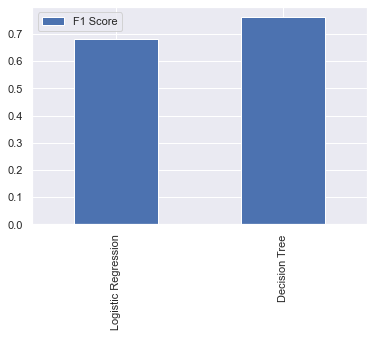

In [149]:
# visualization of model scores
model_scores = {'Logistic Regression':f1_score(y_test, y_pred),
                'Decision Tree':f1_score(y_test, y_pred_2)}

model_compare=pd.DataFrame(model_scores,index=['F1 Score'])
model_compare.T.plot(kind='bar')

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

*Write your description here*

### Report
1. Confusion matrix metric was used to compare the models as it generated the true and false values of the predictions.
2. F1 score metric was used as it gave an optimal blend of recall and precision metrics for imbalanced classification problem.
3. The confusion matrix informs me that the total number of accurate predictions is more than the number of incorrect predictions for the Logistic Regression model and the Decision Tree model.
4. The better performing approach I would consider is the Decision Tree model as it has more accurate prediction than the Logistic Regression model. 

From the model evaluation as revealed by the confusion matric and the F1 Score metric, it can be concluded that the Decision Tree model out performed Logistic regression model with 5.9% for the prediction of 'Never owned' moped reviewers.


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study